In [11]:
import sys
sys.path.append('../src/')

import wider_dataset

from benchmark.tools import *
from benchmark.models import Detector
from benchmark.utils import TsvHandle, run_detection, tf_to_image_faces
plt.rcParams["figure.figsize"] = (15, 10)

# https://github.com/sthanhng/yoloface
from yoloface import get_outputs_names, post_process

In [12]:
train, test, validation = tfds.load('wider_dataset', split=['train', 'test', 'validation'])
data = validation

In [13]:
class YoloFaceDetector(Detector):
    IMG_WIDTH = 416
    IMG_HEIGHT = 416

    CONF_THRESHOLD = 0.5
    NMS_THRESHOLD = 0.4
    
    def __init__(self):
        model_cfg = '../src/yoloface/cfg/yolov3-face.cfg'
        model_weights = '../src/yoloface/model-weights/yolov3-wider_16000.weights'
        
        self.detector = cv2.dnn.readNetFromDarknet(model_cfg, model_weights)
        self.detector.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
        self.detector.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)
    
    def detect(self, image):
        blob = cv2.dnn.blobFromImage(image, 1 / 255, (self.IMG_WIDTH, self.IMG_HEIGHT),
                                     [0, 0, 0], 1, crop=False)
        self.detector.setInput(blob)
        outs = self.detector.forward(get_outputs_names(self.detector))

        boxes, confidence = post_process(image, outs, self.CONF_THRESHOLD, self.NMS_THRESHOLD)

        return boxes, confidence
    
yolo_face = YoloFaceDetector()

Running detection
Speed: 557.3854ms
Precision: 1.0
Recall: 0.875
F1 Score: 0.9333333333333333
Ious: [0.7788707204905467, 0.856114272442225, 0.8571428571428571, 0.8163044945336753, 0.8211567732115678, 0.8721043410550905, 0.6980062191329797]
Positives: 7, False Positives: 0, Negatives: 1


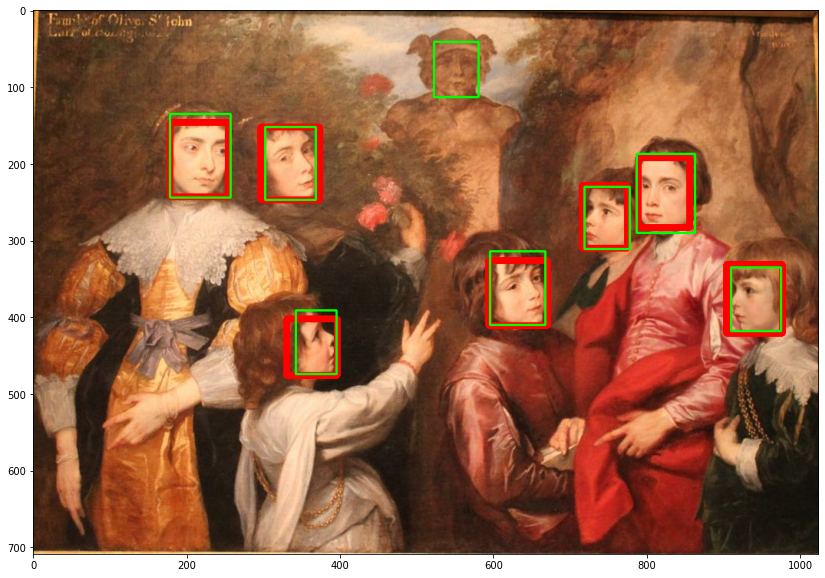

Speed: 408.1439ms
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Ious: []
Positives: 0, False Positives: 0, Negatives: 1


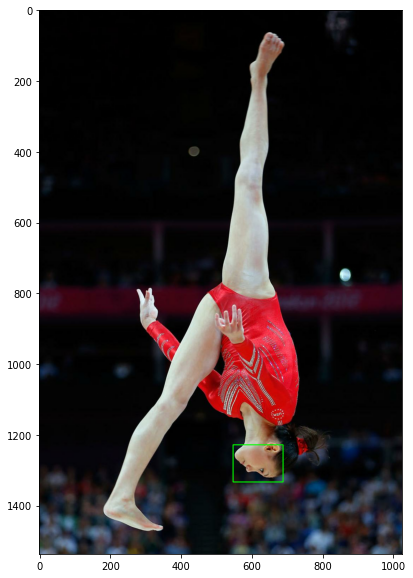

Speed: 364.7533ms
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Ious: [0.740495867768595]
Positives: 1, False Positives: 0, Negatives: 0


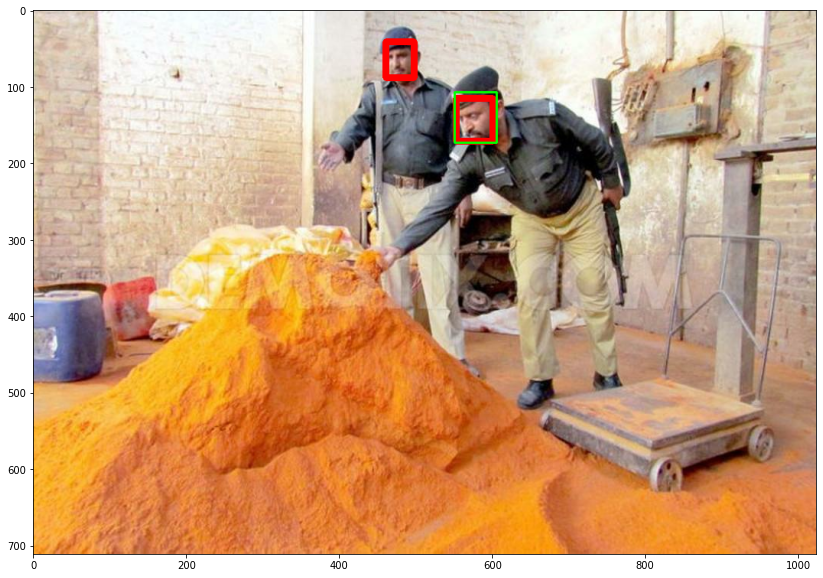

Speed: 368.1713ms
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Ious: []
Positives: 0, False Positives: 0, Negatives: 0


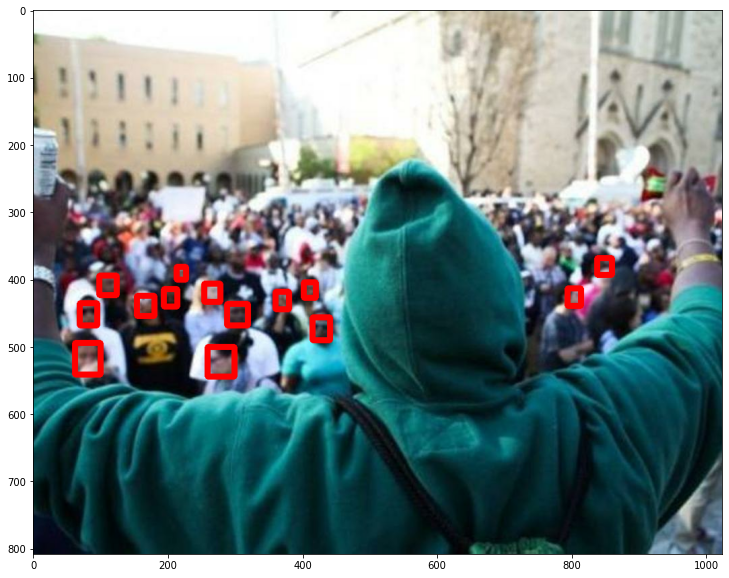

Speed: 383.717ms
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Ious: [0.8104374520337683, 0.7985791893021312, 0.8164779383053494, 0.8868458274398868, 0.8591954022988506, 0.8715415019762845, 0.8091018928715263]
Positives: 7, False Positives: 0, Negatives: 0


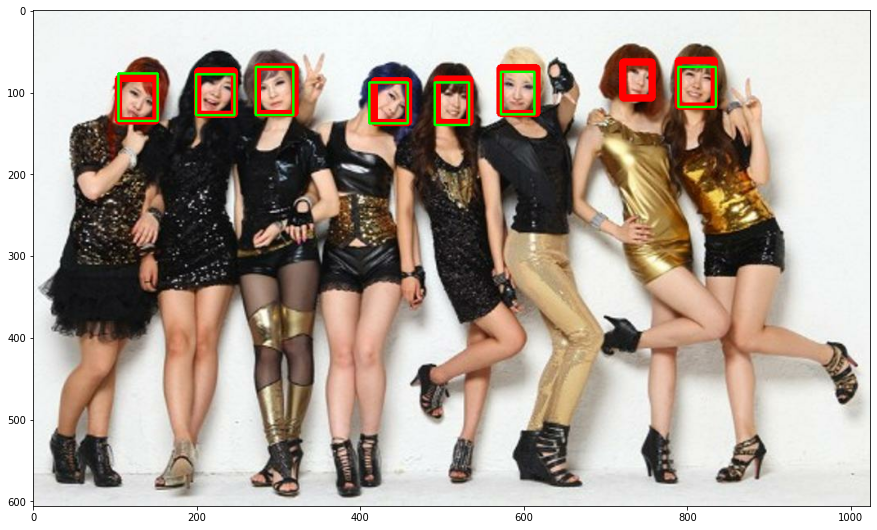

Speed: 382.3005ms
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Ious: []
Positives: 0, False Positives: 0, Negatives: 0


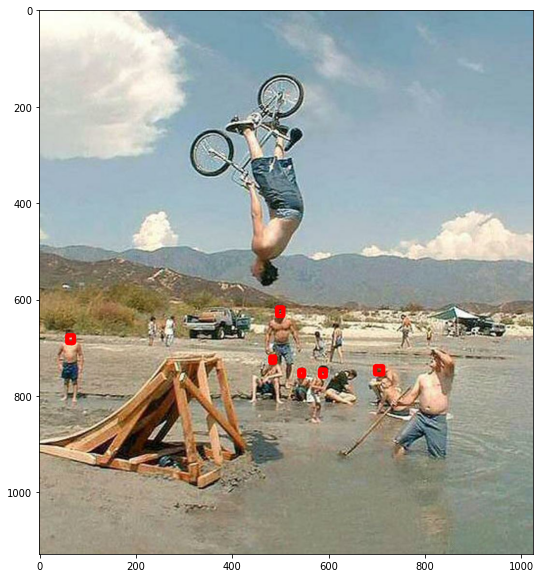

Speed: 382.3423ms
Precision: 1.0
Recall: 0.3333333333333333
F1 Score: 0.5
Ious: [0.8111432706222865]
Positives: 1, False Positives: 0, Negatives: 2


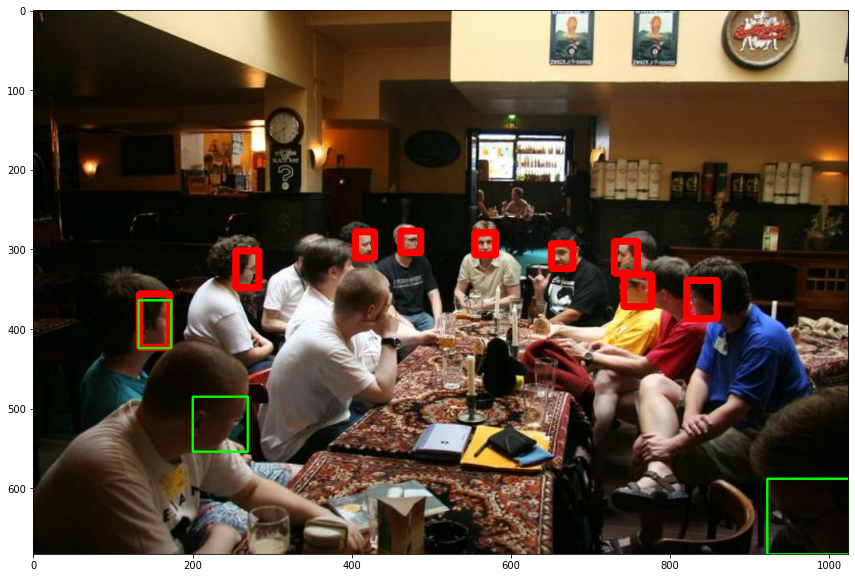

Speed: 398.2065ms
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Ious: [0.883626826526789, 0.7327823691460055, 0.9552825552825552, 0.6817113305124589]
Positives: 4, False Positives: 0, Negatives: 0


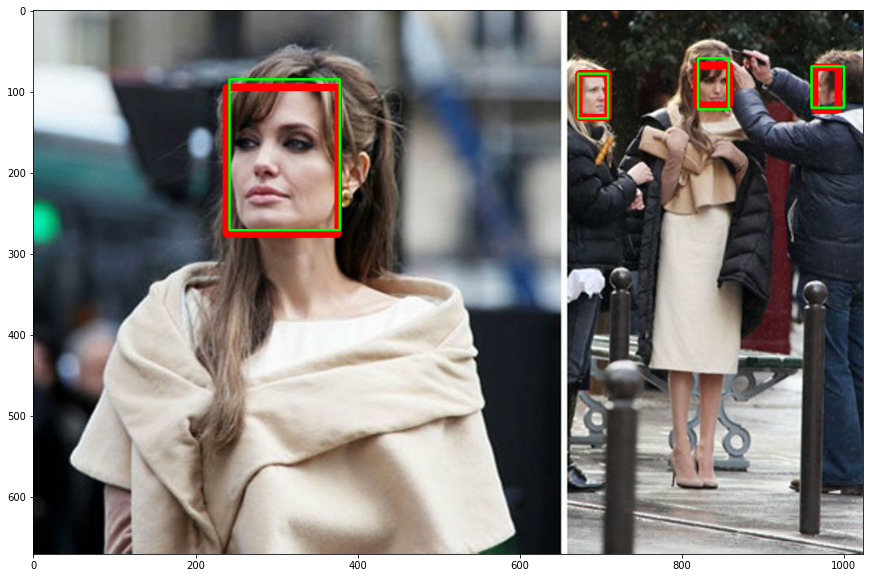

Speed: 385.3826ms
Precision: 1.0
Recall: 0.4
F1 Score: 0.5714285714285715
Ious: [0.580018501387604, 0.7316868982838007]
Positives: 2, False Positives: 0, Negatives: 3


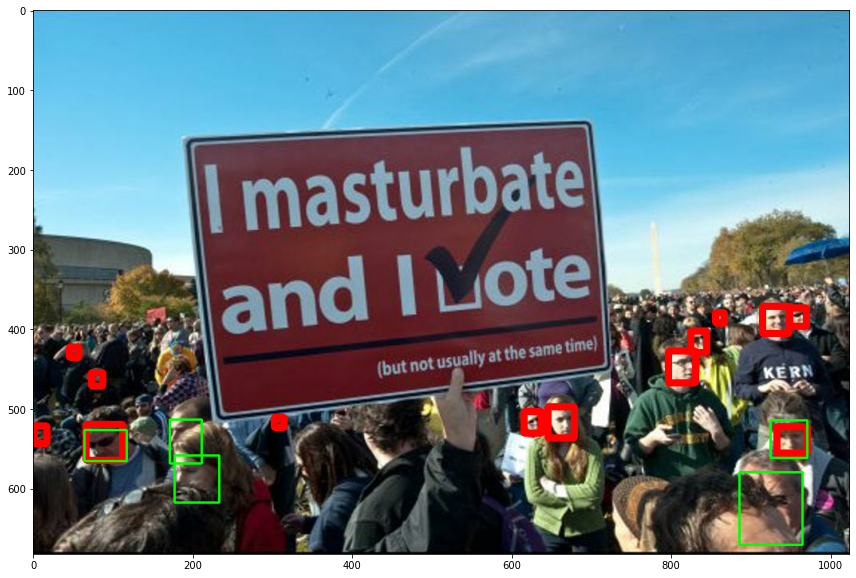

Speed: 383.8559ms
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Ious: [0.6738294394769734, 0.7816558441558441, 0.3926309729418538]
Positives: 3, False Positives: 0, Negatives: 0


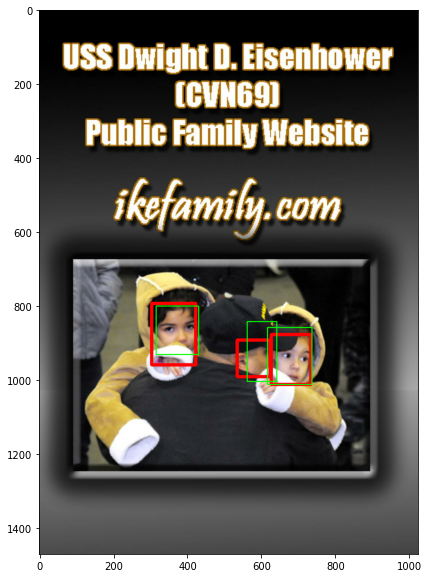

Speed: 405.2486ms
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Ious: []
Positives: 0, False Positives: 0, Negatives: 0


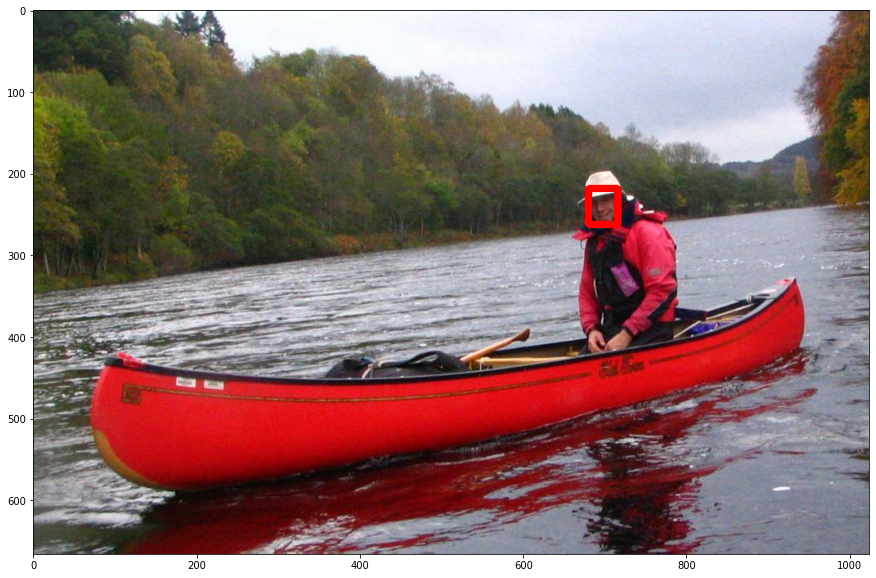

Speed: 377.5367ms
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Ious: [0.8152840487903498]
Positives: 1, False Positives: 0, Negatives: 0


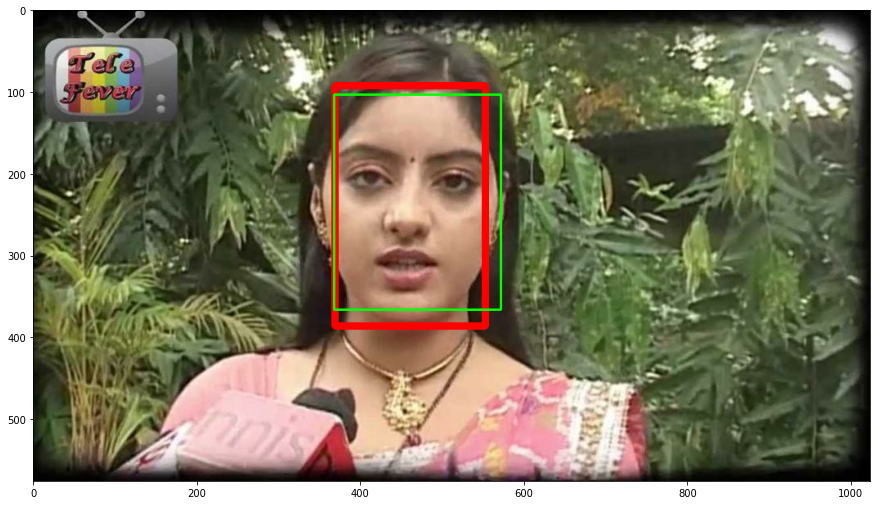

Speed: 421.6632ms
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Ious: [0.8427025493454383]
Positives: 1, False Positives: 0, Negatives: 0


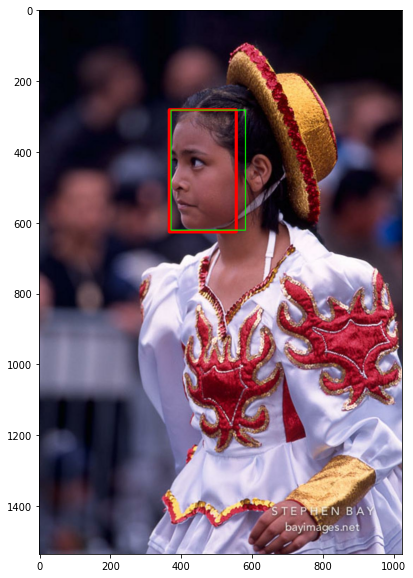

<class 'KeyboardInterrupt'>  <traceback object at 0x000001D4F72D0080>


KeyboardInterrupt: 

In [14]:
with TsvHandle('yoloface_filtered') as tsv:
    run_detection(tsv, data, yolo_face, cv2.COLOR_RGB2BGR, True, True, cv2.COLOR_BGR2RGB, 2000)